In [1]:
# import the packages
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-kcjq6g2a
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-kcjq6g2a
     |████████████████████████████████| 6.1 MB 5.6 MB/s 
     |████████████████████████████████| 18.0 MB 130 kB/s 
     |████████████████████████████████| 234 kB 46.7 MB/s 
     |████████████████████████████████| 207 kB 45.5 MB/s 
     |████████████████████████████████| 2.1 MB 48.8 MB/s 
     |████████████████████████████████| 199 kB 62.2 MB/s 
     |████████████████████████████████| 1.4 MB 49.1 MB/s 
     |████████████████████████████████| 635 kB 51.8 MB/s 
     |████████████████████████████████| 68 kB 5.6 MB/s 
     |████████████████████████████████| 943 kB 43.3 MB/s 
     |████████████████████████████████| 33.9 MB 19 kB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 3.2 MB 56.1 MB/s 
     |████████████████████████████████| 

In [2]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [3]:
# Perform the X-gate on |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

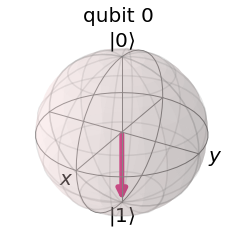

In [4]:
# Plot it in bloch vector
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [5]:
# Perform the Pauli Y-Gate
qc_y = QuantumCircuit(1)
qc_y.y(0)
qc_y.draw()

┌───┐
q_0: ┤ Y ├
     └───┘

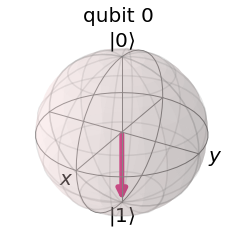

In [6]:
qc_y.save_statevector()
qobj = assemble(qc_y)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [7]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [8]:
# perform Pauli-Z gate
qc_z = QuantumCircuit(1)
qc_z.z(0)
qc_z.draw()

┌───┐
q_0: ┤ Z ├
     └───┘

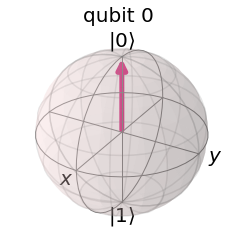

In [9]:
qc_z.save_statevector()
qobj = assemble(qc_z)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [10]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [11]:
# Create the X-measurement function:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

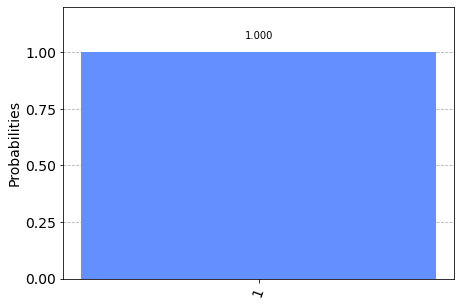

In [12]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [13]:
initial_state = [1/sqrt(2), 1/sqrt(2)]
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌─────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,0.70711) ├┤ H ├┤M├
     └─────────────────────────────┘└───┘└╥┘
c: 1/═════════════════════════════════════╩═
                                          0

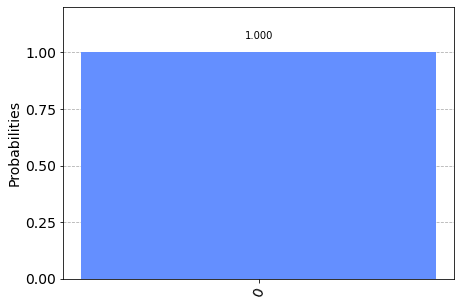

In [14]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [15]:
# create the Y-measurement function:
def y_measurement(qc, qubit, cbit):
  qc.h(qubit)
  qc.measure(qubit, cbit)
  return qc

In [16]:
initial_state = [1/sqrt(2), -1/sqrt(2)]
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
y_measurement(qc, 0, 0)
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
q_0: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

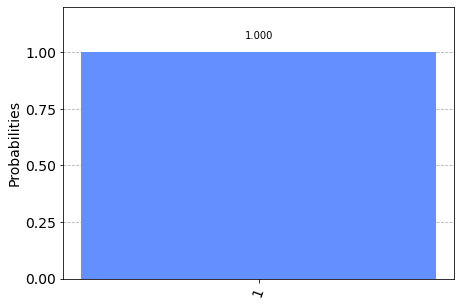

In [17]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [18]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [19]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

┌────────┐
q_0: ┤ P(π/4) ├
     └────────┘

In [20]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ S ├┤ Sdg ├
     └───┘└─────┘

In [21]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q_0: ┤ T ├┤ Tdg ├
     └───┘└─────┘

In [22]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo()

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…